<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/%D0%9C.%D0%91.%D0%A1./%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [3]:
#Создание выборки случайных чисел
exp100 = np.random.exponential(scale=1, size=(100,))
exp1000 = np.random.exponential(scale=1, size=(1000,))
exp_scale = 1

norm100 = np.random.normal(loc=0, scale=1, size=(100,))
norm1000 = np.random.normal(loc=0, scale=1, size=(1000,))
norm_mean = 0
norm_std = 1

ars = {"exp100":exp100,"exp1000": exp1000, "norm100": norm100, "norm1000": norm1000}
print (exp100, '   ')
print (exp1000, '   ')
print (norm100, '   ')
print (norm1000, '   ')

[1.07037714 1.20508105 0.16901464 0.54593052 0.0276128  0.52135973
 0.86933371 0.99191183 0.31915994 1.28061843 3.0696119  0.1941672
 1.11319865 2.63003999 0.64687416 2.38904332 5.15882154 0.49926605
 0.08654865 1.52723326 0.03856858 0.17718537 1.81410319 0.43177819
 1.17318275 1.02582139 1.84189494 1.71449034 1.62567393 0.47564973
 0.50530839 1.17326324 0.27298293 1.92455484 0.41564383 1.41197108
 0.54977002 0.50834284 3.59407857 0.39909877 1.20168344 1.6520218
 1.41118242 0.02102783 1.97405426 2.45853834 1.03458496 0.02709293
 0.60506129 0.27081655 1.17670308 1.62775681 1.07023708 3.58223565
 0.14028393 0.39983716 3.80251084 0.87299891 0.13598061 0.16344991
 2.87226023 1.7725742  0.71956935 0.38307025 0.61598358 0.89607886
 0.13574476 1.62935431 1.20419759 0.29307049 0.23270199 2.85012404
 0.31730594 0.19068145 0.6059643  0.10216117 0.08226559 0.41389557
 1.34698851 0.63488895 0.07183809 0.04939097 0.01186963 0.28065856
 0.49777714 0.4605369  1.82361408 1.81657124 0.37995929 3.203149

In [4]:
#Дисперсия и среднее значение
for i in ars:
    m = np.mean(ars[i])
    v = np.var(ars[i])
    if "exp" in i:
        print("mean: ", m, " | origin ", exp_scale)
        print("var", v, " | origin ", exp_scale)
    else:
        print("mean: ", m, " | origin ", norm_mean)
        print("var", v, " | origin ", norm_std)

mean:  1.0844503587476142  | origin  1
var 1.2164602999980554  | origin  1
mean:  1.0386096724102762  | origin  1
var 1.258324910311287  | origin  1
mean:  -0.028116550277289442  | origin  0
var 0.8928817875022204  | origin  1
mean:  0.04143163510265994  | origin  0
var 0.9677836847855638  | origin  1


q05 0.683221752443375  | origin  0.693147
q99 5.166406321812543  | origin  4.6
_____


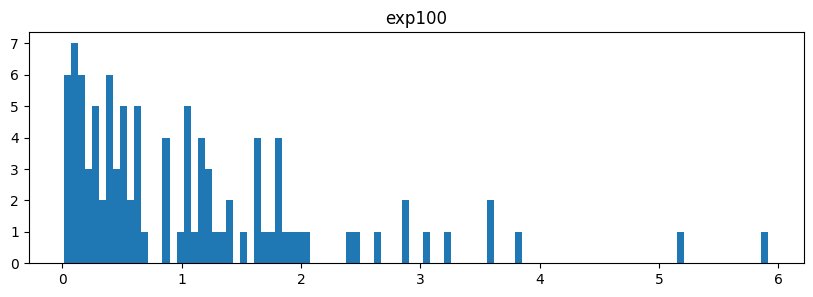

q05 0.6883762202899619  | origin  0.693147
q99 5.441094860528718  | origin  4.6
_____


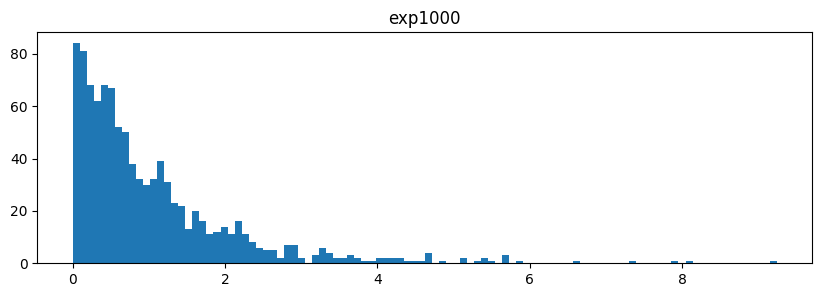

q05 -0.09214998617436215  | origin  0
q99 2.272388386998152  | origin  2.3
_____


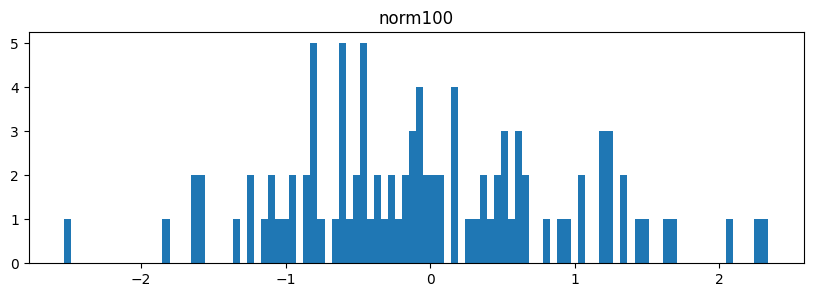

q05 0.04178986144584638  | origin  0
q99 2.306202692209521  | origin  2.3
_____


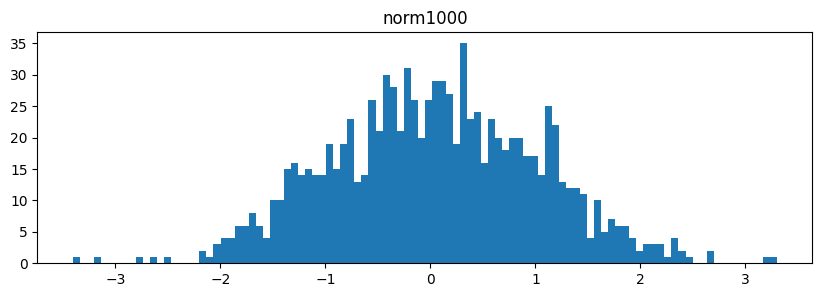

In [5]:
# 0.5 и 0.99 квантили
for i in ars:
    q05 = np.quantile(ars[i], q=0.5)
    q99 = np.quantile(ars[i], q=0.99)

    if "exp" in i:
        print("q05", q05, " | origin ", 0.693147)
        print("q99", q99, " | origin ", 4.6)
        print("_"*5)
    else:
        print("q05", q05, " | origin ", 0)
        print("q99", q99, " | origin ", 2.3)
        print("_"*5)

    #Uистограммs распределения
    plt.figure(figsize=(10,3))
    plt.hist(ars[i], bins=100)
    plt.title(i)
    plt.show()

In [6]:
def f_exp(l, x):
    return 1-np.exp(-l*x)

In [7]:
theory_exp_x = np.linspace(0,10,100)
theory_exp_y = f_exp(1, theory_exp_x)

In [8]:
exp100_s = sorted(np.copy(exp100))
exp1000_s = sorted(np.copy(exp1000))

In [9]:
exp100_y = np.arange(0.,1.,0.01)
exp1000_y = np.arange(0.,1.,0.001)

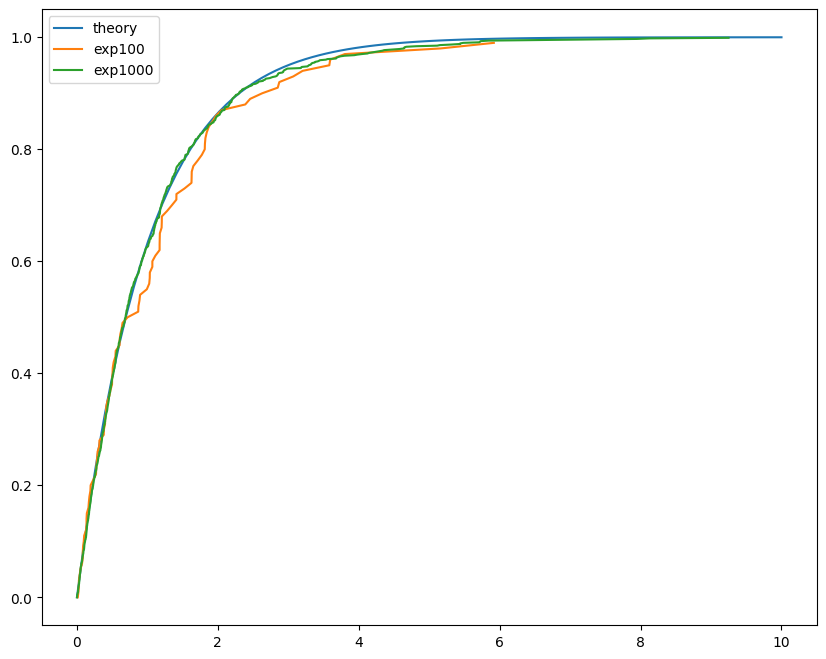

In [10]:
plt.figure(figsize=(10,8))
plt.plot(theory_exp_x, theory_exp_y, label="theory")
plt.plot(exp100_s, exp100_y, label="exp100")
plt.plot(exp1000_s, exp1000_y, label="exp1000")
plt.legend()

In [11]:
from math import erf

In [12]:
def f(x, m, s):
    return 0.5*(1+erf((x-m)/np.sqrt(2*s**2)))

In [13]:
theory_x_norm = np.linspace(-3,3,100)
theory_y_norm=[]
for i in theory_x_norm:
    theory_y_norm.append(f(i,0,1))

In [14]:
norm100_s = sorted(np.copy(norm100))
norm1000_s = sorted(np.copy(norm1000))

In [15]:
norm100_y = np.arange(0., 1., 0.01)
norm1000_y = np.arange(0., 1., 0.001)

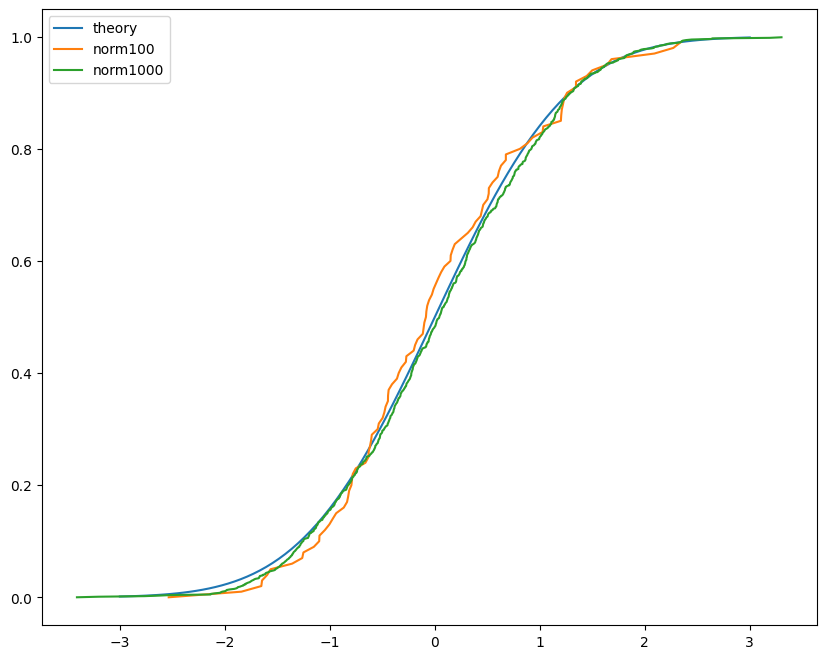

In [16]:
plt.figure(figsize=(10,8))

plt.plot(theory_x_norm, theory_y_norm, label="theory")
plt.plot(norm100_s, norm100_y, label="norm100")
plt.plot(norm1000_s, norm1000_y, label="norm1000")
plt.legend()

In [17]:
def exp_p(l, x):
    return l*np.exp(-l*x)

In [18]:
theory_exp_p_x = np.linspace(0,10,100)
theory_exp_p_y = exp_p(1, theory_exp_p_x)

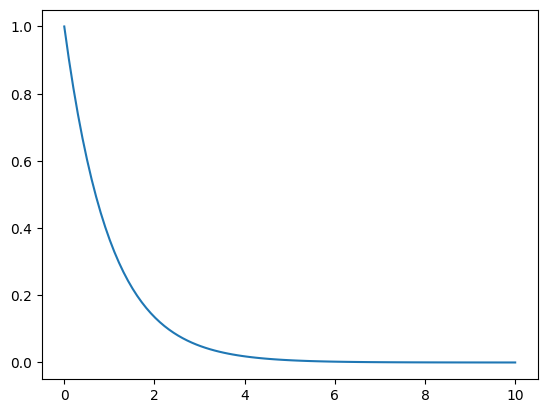

In [19]:
plt.plot(theory_exp_p_x, theory_exp_p_y)

In [20]:
def norm_p(x, m, s):
     return 1/(s*np.sqrt(2*np.pi))*np.exp(-0.5*((x-m)/s)**2)

In [21]:
theory_norm_p_x = np.linspace(-3, 3, 100)
theory_norm_p_y = norm_p(theory_norm_p_x, 0, 1)

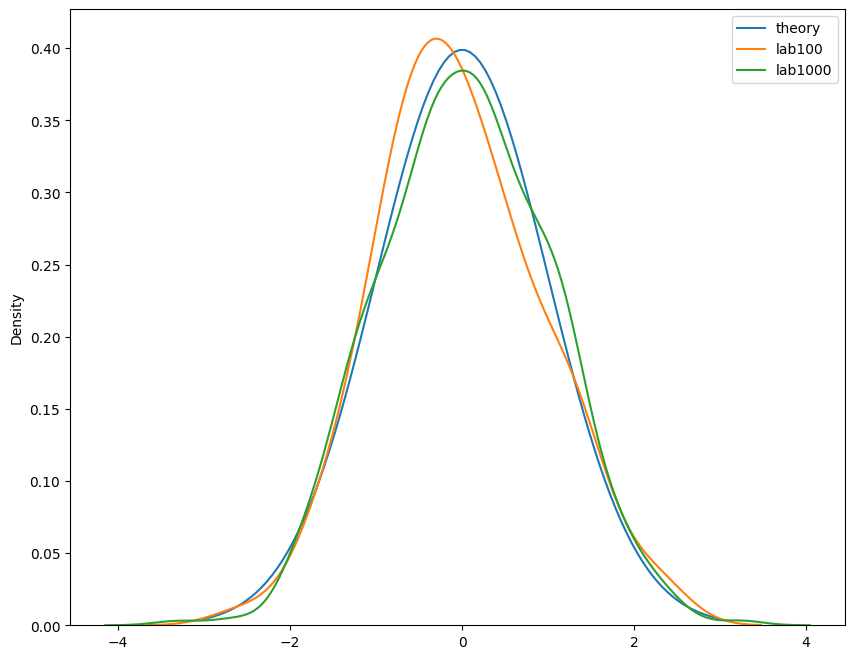

In [22]:
plt.figure(figsize=(10,8))

plt.plot(theory_norm_p_x, theory_norm_p_y, label="theory")
sns.kdeplot(norm100, label="lab100")
sns.kdeplot(norm1000, label="lab1000")
plt.legend()

In [23]:
a = 10
b = 30
def dist(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [24]:
def create_d(length):
    D = []
    for i in range(length):
        x1,x2 = np.random.uniform(0,a),np.random.uniform(0,a)
        y1,y2 = np.random.uniform(0,b),np.random.uniform(0,b)
        D.append(dist(x1,y1,x2,y2))
    D.sort()
    return D

In [25]:
l100 = create_d(100)
l1000 = create_d(1000)
l10000 = create_d(10000)

In [26]:
x100 = np.linspace(0, np.sqrt(a*a + b*b), 100)
x1000 = np.linspace(0, np.sqrt(a*a + b*b), 1000)
x10000 = np.linspace(0, np.sqrt(a*a + b*b), 10000)

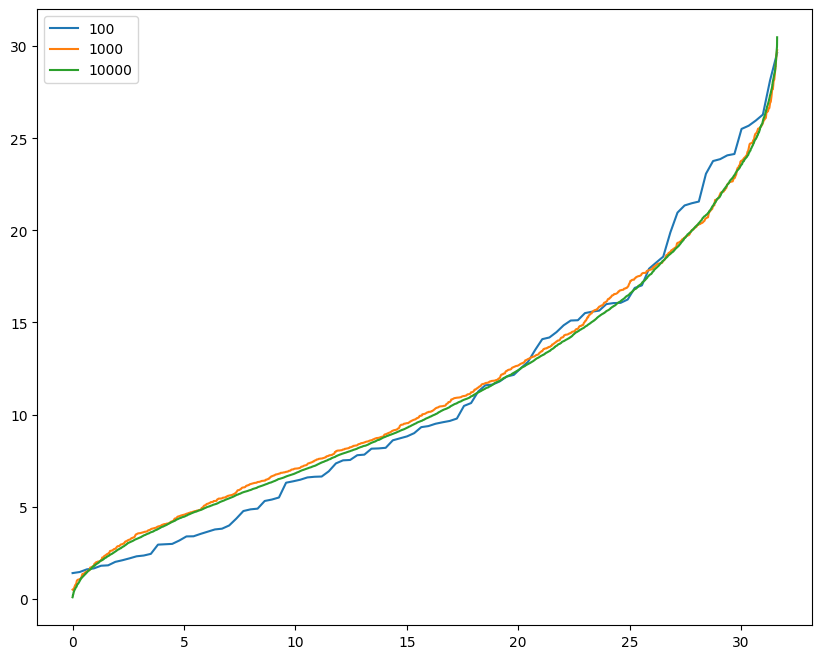

In [27]:
plt.figure(figsize=(10,8))

plt.plot(x100, l100, label="100")
plt.plot(x1000, l1000, label="1000")
plt.plot(x10000, l10000, label="10000")
plt.legend()

In [28]:
kde_dist_1_y = gaussian_kde(l100).evaluate(l100)
kde_dist_2_y = gaussian_kde(l1000).evaluate(l1000)
kde_dist_3_y = gaussian_kde(l10000).evaluate(l10000)

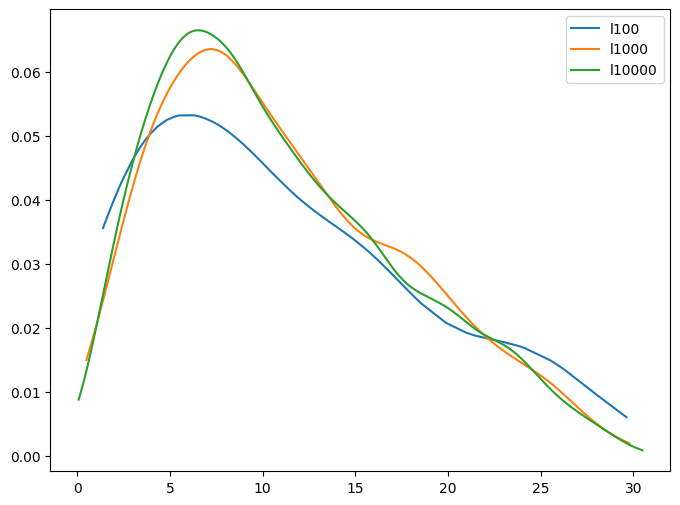

In [29]:
plt.figure(figsize=(8,6))

plt.plot(l100, kde_dist_1_y, label="l100")
plt.plot(l1000, kde_dist_2_y, label="l1000")
plt.plot(l10000, kde_dist_3_y, label="l10000")

plt.legend()